<a href="https://colab.research.google.com/github/solharsh/Computer_Vision/blob/master/image_recognition_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50 #importing resnet50 model

# Load Keras' ResNet50 model by creating instanace that was pre-trained against the ImageNet database
model = resnet50.ResNet50()

# Loading the image file (This is sample image I too of some church from my last Goa trip before lockdown), resizing it to 224x224 pixels (required by this model as the original image will be
#too big for the model)
img = image.load_img("/content/drive/My Drive/IMG_0141-EFFECTS.jpg", target_size=(224, 224)) #Required size for resnet50

Let's also see the actual image and check it's size too. 

In [17]:
import cv2
 
image2 = imread('/content/drive/My Drive/IMG_0141-EFFECTS.jpg')
 
# Let's check the type of this image data
print("Type:", type(image2))
 
# See the shape of it
print("Shape:", image2.shape)

Type: <class 'numpy.ndarray'>
Shape: (3024, 4032, 3)


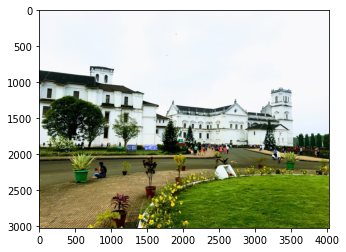

In [18]:
import matplotlib.pyplot as plt
 
plt.imshow(image2)
plt.show()

As we can see the size of the image is quite large for resnet or anyother model to use and that is why, resizing it to 224 by 224 pixels

In [22]:
# Convert the image to a numpy array
x = image.img_to_array(img) # will convert into 3 dimension array. First 2 are height and width (224 by 224). Third is color (RGB values)

# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x) # prediction object : 1000 prediction array of floating point numbers
#each line shows how likely it resembels the object out of 1000 on which the image net dataset is trained on

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=10)

print("This is an image of:")
#need internet access to run it as keras will first download the latest resnet50 and data will be downloaded
for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - castle: 0.361077 likelihood
 - palace: 0.224156 likelihood
 - lakeside: 0.057858 likelihood
 - triumphal_arch: 0.056192 likelihood
 - monastery: 0.046800 likelihood
 - rapeseed: 0.022853 likelihood
 - greenhouse: 0.013769 likelihood
 - wreck: 0.013721 likelihood
 - seashore: 0.008917 likelihood
 - park_bench: 0.008767 likelihood


That's awesome. With minimal coding, we were able to predict that our picture is most likely a castle with 36 percent likelihood. The likelihood is not that great and the model is confused between a church and castle. 

To be honest, I would have guessed it to be castle too without knowing the place.

Let's take another example image and see it's likelihood prediction.

In [0]:
img2 = image.load_img("/content/drive/My Drive/Computer_vision/cats-and-dogs/cats_and_dogs/training/dogs/dog.2506.jpg", target_size=(224, 224)) #Required size for resnet50

In [35]:
# Convert the image to a numpy array
x = image.img_to_array(img2) # will convert into 3 dimension array. First 2 are height and width (224 by 224). Third is color (RGB values)

# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x) # prediction object : 1000 prediction array of floating point numbers
#each line shows how likely it resembels the object out of 1000 on which the image net dataset is trained on

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=10)

print("This is an image of:")
#need internet access to run it as keras will first download the latest resnet50 and data will be downloaded
for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - standard_poodle: 0.996770 likelihood
 - miniature_poodle: 0.002369 likelihood
 - toy_poodle: 0.000476 likelihood
 - Bedlington_terrier: 0.000317 likelihood
 - komondor: 0.000038 likelihood
 - Irish_water_spaniel: 0.000010 likelihood
 - cocker_spaniel: 0.000003 likelihood
 - Afghan_hound: 0.000002 likelihood
 - clumber: 0.000002 likelihood
 - soft-coated_wheaten_terrier: 0.000002 likelihood


That's great. So, this confirms that resnet50 can very accurately predict generic images but it gets confused too to some extent while dealing with a very specific image. 

Type: <class 'numpy.ndarray'>
Shape: (374, 500, 3)


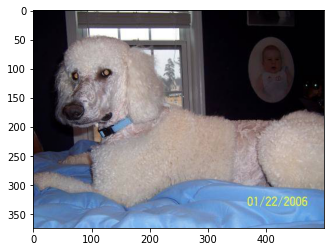

In [34]:
import cv2
 
image2 = imread('/content/drive/My Drive/Computer_vision/cats-and-dogs/cats_and_dogs/training/dogs/dog.2506.jpg')
 
# Let's check the type of this image data
print("Type:", type(image2))
 
# See the shape of it
print("Shape:", image2.shape)

import matplotlib.pyplot as plt
 
plt.imshow(image2)
plt.show()